In [104]:
import numpy as np 
a = np.random.normal(98, 12, 100)
b = np.random.normal(72, 12, 100)

In [105]:
a_label = [1 if i % 14 == 0 else 0 for i in range(100)]
b_label = [0 if i % 14 == 0 else 1 for i in range(100)]

In [106]:
import pandas as pd
df = pd.DataFrame()
df['x'] = np.concatenate((a, b))
df['y'] = np.concatenate((a_label, b_label))

In [107]:
df['bin'] = pd.qcut(df['x'], q=5, labels=[0,1,2,3,4])
#df.sort_values(by='x')
df

,x,y,bin
0,107.919054,1,4
1,124.701866,0,4
2,79.700612,0,1
3,111.783614,0,4
4,77.623078,0,1
...,...,...,...
195,75.804238,1,1
196,69.731941,1,1
197,71.481417,1,1
198,57.088458,0,0


In [108]:
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='bin'>

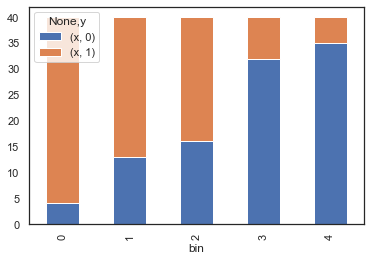

In [109]:
#create stacked bar chart
df_pivot = df.groupby(['bin', 'y']).count().reset_index().pivot(columns=['y'], index='bin')
df_pivot.plot(kind='bar', stacked=True)

In [110]:
y = df['y']
df_logit = df.drop(['y', 'bin'], axis=1)

In [111]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
trained = logit.fit(df_logit, y)
predictions = trained.predict(df_logit)

In [112]:
trained.score(df_logit, y)

0.765

In [113]:
trained.coef_

array([[-0.09181733]])